## Classificação de compostos químicos e métodos de interpretabilidade

Objetivo : classificação de compostos químicos baseada na sua capacidade de interagir com a proteína p53 (elemento importante na prevenção do desenvolvimento de tumores)
Dataset: TOX21

<b>NR-AR, NR-ER, NR-AhR, NR-PPAR-gamma</b>: Esses atributos rep-
resentam a atividade de receptores nucleares, como o receptor de andrógeno
(AR), estrogênio (ER), hidrocarboneto aromático (AhR) e receptor ativado
por proliferadores de peroxissoma-gama (PPAR-gama). Esses receptores es-
tão envolvidos em diversos processos celulares, incluindo crescimento celular,
diferenciação e apoptose, os quais também são regulados pela proteína p53.
Compostos que modulam a atividade desses receptores podem afetar indire-
tamente as vias mediadas por p53

<b>NR-Aromatase</b>: Aromatase é uma enzima envolvida na biossíntese de es-
trogênio. Os receptores de estrogênio (ERs) desempenham um papel na
regulação da expressão e atividade da p53. Compostos que influenciam a
atividade da aromatase podem impactar os níveis de estrogênio, afetando
potencialmente as respostas mediadas por p53.

<b>SR-p53</b>: Este atributo representa a atividade da própria proteína p53.

<b>SR-ARE</b>, SR-ATAD5, SR-HSE, SR-MMP: Esses atributos representam a atividade de receptores xenobióticos ou vias moleculares relacionadas
à resposta celular ao estresse, reparo de DNA e metaloproteinases da matriz.
Embora essas vias possam não interagir diretamente com a p53, elas podem
se intersectar com as vias mediadas por p53, influenciando as respostas celu-
lares ao estresse, danos ao DNA e tumorigênese.

<b>mol_id</b>: Este atributo representa um identificador único atribuído a cada
composto no conjunto de dados. Ele serve como uma referência ou chave para
distinguir um composto de outro dentro do conjunto de dados. O mol_id não
fornece informações sobre a atividade biológica do composto, mas é essencial
para a organização e gestão dos dados.

<b>smiles</b>: SMILES significa Simplified Molecular Input Line Entry System, que
é um sistema de notação usado para representar a estrutura de moléculas
químicas como strings de texto. As strings SMILES codificam o arranjo
de átomos e ligações em uma molécula, fornecendo uma forma compacta e
padronizada de descrever estruturas químicas

In [66]:
%load_ext autoreload
%autoreload 2
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
import torch.nn.functional as F
import os
from cairosvg import svg2png, svg2ps

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
ds = pd.read_csv('data/tox21.csv')

**Data Pre-processing**

In [68]:
ds.head()

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX3024,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O


In [69]:
ds.shape

(7831, 14)

In [70]:
#ds.dropna(subset=['SR-p53'],inplace=True)
ds["SR-p53"].fillna(1.0, inplace=True)

C:\Users\joaop\AppData\Local\Temp\ipykernel_17092\2860210731.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds["SR-p53"].fillna(1.0, inplace=True)


In [71]:
ds.isnull().sum()

NR-AR             566
NR-AR-LBD        1073
NR-AhR           1282
NR-Aromatase     2010
NR-ER            1638
NR-ER-LBD         876
NR-PPAR-gamma    1381
SR-ARE           1999
SR-ATAD5          759
SR-HSE           1364
SR-MMP           2021
SR-p53              0
mol_id              0
smiles              0
dtype: int64

In [72]:
ds.fillna(0, inplace=True)
ds.isnull().sum()

NR-AR            0
NR-AR-LBD        0
NR-AhR           0
NR-Aromatase     0
NR-ER            0
NR-ER-LBD        0
NR-PPAR-gamma    0
SR-ARE           0
SR-ATAD5         0
SR-HSE           0
SR-MMP           0
SR-p53           0
mol_id           0
smiles           0
dtype: int64

A coluna mol_id representa um id usado pela comunidade cientifica para o reconhecimento de um composto quimico por isso não sendo relevante nesta pesquisa. 

In [73]:
print(ds['mol_id'].duplicated().sum())

0


In [74]:
ds.drop('mol_id', axis=1, inplace=True)

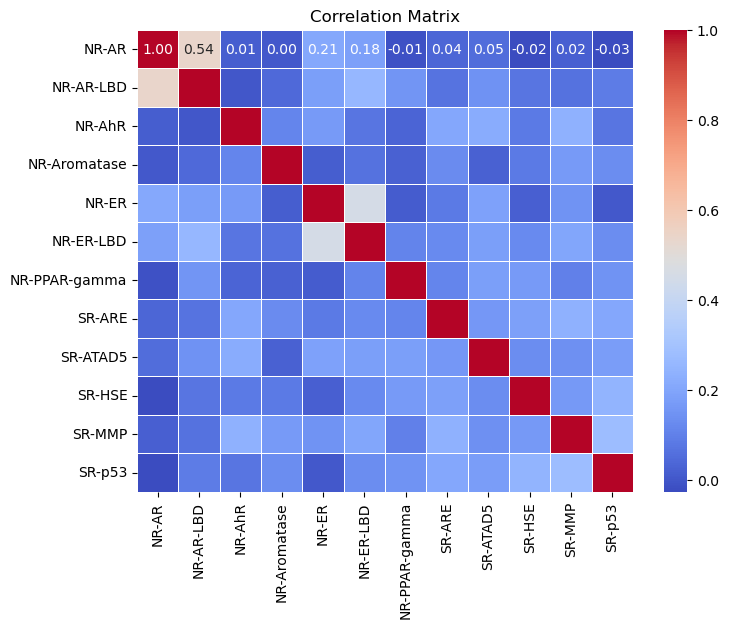

In [75]:
ds1 = ds.drop(['smiles'], axis=1)
correlation = ds1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [76]:
mols = pd.DataFrame()
mols["smiles"] = ds['smiles'].apply(Chem.MolFromSmiles)

[11:53:52] WARNING: not removing hydrogen atom without neighbors


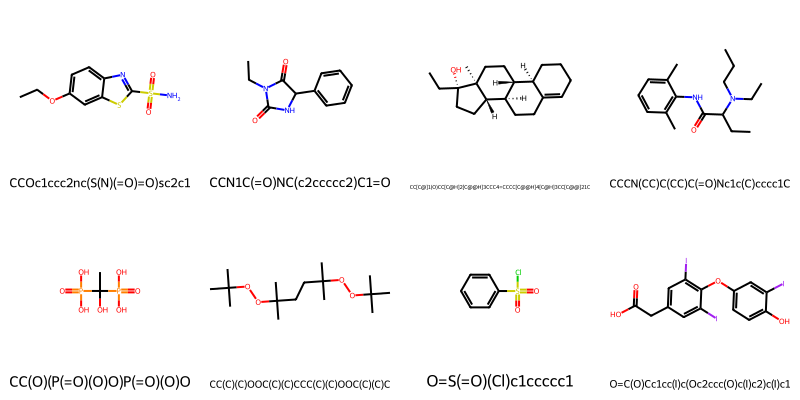

In [77]:
Draw.MolsToGridImage(mols['smiles'][:8],molsPerRow=4,subImgSize=(200,200),legends=[Chem.MolToSmiles(x) for x in mols['smiles'][:8]])

In [78]:
ds.head()

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,smiles
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCN1C(=O)NC(c2ccccc2)C1=O
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CC(O)(P(=O)(O)O)P(=O)(O)O


In [79]:
def getAtrValue(atr,smiles):
    return ds.loc[ds['smiles'] == smiles, atr].iloc[0]

In [80]:
def notactive(n):
    if(n==0.0): return True
    else: return False

def isactive(n):
    if(n==1.0): return True
    else: return False

active = filter(isactive,ds['SR-p53'])
inactive = filter(notactive,ds['SR-p53'])
print("Existem "+str(len(list(active)))+ " compostos químicos reativos à SR-p53.")
print("Existem "+str(len(list(inactive)))+ " compostos químicos não reativos à SR-p53.")

Existem 1480 compostos químicos reativos à SR-p53.
Existem 6351 compostos químicos não reativos à SR-p53.


**Get default device as CPU or cuda(GPU) based on availability**

In [81]:
#setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

#force cpu
#device = torch.device("cpu")
print('Using device:', device)

Using device: cpu


**Converter cada uma das moléculas num grafo**

A representação de um grafo pode ser feita convertendo uma molécula (rdkit.chem.mol) para uma instância torch_geometric.data.Data do Pytorch Geometric.

- Podemos utilizar as propriedades de cada molécula do dataset, juntamente com outras fornecidas pela biblioteca rdkit.chem.mol.
- Iterar pelos átomos e adicioná-los num vetor que será convertido para um tensor PyTorch.
- Depois iterar pelas ligações, sendo que as extremidades vão para a lista edge_index, enquanto que os vetores das ligações vão para a edge_attr.
- Após a conversão destas listas para tensores e de ordenar os índices temos os dados necessários para criar a instância Data.

<a href="https://pytorch-geometric.readthedocs.io/en/latest/_modules/torch_geometric/utils/smiles.html">https://pytorch-geometric.readthedocs.io/en/latest/_modules/torch_geometric/utils/smiles.html</a>

In [82]:
atom_characteristics = {
    #RDKIT.CHEM.MOL CHARACTERISTICS
    'atomic_num': list(range(0, 119)),
    'chirality': ['CHI_UNSPECIFIED','CHI_TETRAHEDRAL_CW','CHI_TETRAHEDRAL_CCW','CHI_OTHER','CHI_TETRAHEDRAL','CHI_ALLENE','CHI_SQUAREPLANAR','CHI_TRIGONALBIPYRAMIDAL','CHI_OCTAHEDRAL'],
    'degree': list(range(0, 11)),
    'formal_charge': list(range(-5, 7)),
    'num_hs': list(range(0, 9)),
    'num_radical_electrons': list(range(0, 5)),
    'hybridization': ['UNSPECIFIED','S','SP','SP2','SP3','SP3D','SP3D2','OTHER'],
    'is_aromatic': [False, True],
    'is_in_ring': [False, True],
}

bond_characteristics= {
    #RDKIT.CHEM.MOL CHARACTERISTICS
    'bond_type': ['UNSPECIFIED','SINGLE','DOUBLE','TRIPLE','QUADRUPLE','QUINTUPLE','HEXTUPLE','ONEANDAHALF','TWOANDAHALF','THREEANDAHALF','FOURANDAHALF','FIVEANDAHALF','AROMATIC','IONIC','HYDROGEN','THREECENTER','DATIVEONE','DATIVE','DATIVEL','DATIVER','OTHER','ZERO'],
    'stereo': ['STEREONONE','STEREOANY','STEREOZ','STEREOE','STEREOCIS','STEREOTRANS'],
    'is_conjugated': [False, True],
}

função molecule_to_graph(strsmiles:string, label:double->SR-p53,mol:RDkit.Chem.Mol)

In [83]:
from torch_geometric.data import Data

def molecule_to_graph(strsmiles,label,mol):

    xs = []
    additional_properties = []

    for atom in mol.GetAtoms():

        x = []
        x.append(atom_characteristics['atomic_num'].index(atom.GetAtomicNum()))
        x.append(atom_characteristics['chirality'].index(str(atom.GetChiralTag())))
        x.append(atom_characteristics['degree'].index(atom.GetTotalDegree()))
        x.append(atom_characteristics['formal_charge'].index(atom.GetFormalCharge()))
        x.append(atom_characteristics['num_hs'].index(atom.GetTotalNumHs()))
        x.append(atom_characteristics['num_radical_electrons'].index(atom.GetNumRadicalElectrons()))
        x.append(atom_characteristics['hybridization'].index(str(atom.GetHybridization())))
        x.append(atom_characteristics['is_aromatic'].index(atom.GetIsAromatic()))
        x.append(atom_characteristics['is_in_ring'].index(atom.IsInRing()))

        xs.append(x)

    x = torch.tensor(xs, dtype=torch.float).view(-1, 9)

    edge_indices, edge_attrs = [], []
    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()

        e=[
            bond_characteristics['bond_type'].index(str(bond.GetBondType())),
            bond_characteristics['stereo'].index(str(bond.GetStereo())),
            bond_characteristics['is_conjugated'].index(bond.GetIsConjugated())
            ]
        e += [0] * (32 - len(e))

        edge_indices += [[i, j], [j, i]]
        edge_attrs += [e, e]

    edge_index = torch.tensor(edge_indices)
    edge_index = edge_index.t().to(torch.long).view(2, -1)
    edge_attr = torch.tensor(edge_attrs, dtype=torch.float).view(-1, 1)

    label = torch.tensor(label, dtype=torch.long)

    if edge_index.numel() > 0:
        perm = (edge_index[0] * x.size(0) + edge_index[1]).argsort()
        edge_index, edge_attr = edge_index[:, perm], edge_attr[perm]

    data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y = label, smiles=strsmiles)

    additional_properties.append(getAtrValue("NR-AR",data.smiles))
    additional_properties.append(getAtrValue("NR-AR-LBD",data.smiles))
    additional_properties.append(getAtrValue("NR-AhR",data.smiles))
    additional_properties.append(getAtrValue("NR-Aromatase",data.smiles))
    additional_properties.append(getAtrValue("NR-ER",data.smiles))
    additional_properties.append(getAtrValue("NR-ER-LBD",data.smiles))
    additional_properties.append(getAtrValue("NR-PPAR-gamma",data.smiles))
    additional_properties.append(getAtrValue("SR-ARE",data.smiles))
    additional_properties.append(getAtrValue("SR-ATAD5",data.smiles))
    additional_properties.append(getAtrValue("SR-HSE",data.smiles))
    additional_properties.append(getAtrValue("SR-MMP",data.smiles))
    additional_properties = torch.tensor(additional_properties, dtype=torch.long).view(-1, 11)

    data.additionalproperties = additional_properties
    return data

In [84]:
process_func = lambda mols: molecule_to_graph(mols['smiles'], mols['SR-p53'], Chem.MolFromSmiles(mols['smiles']))
list_data = list(map(process_func,ds.iloc))
list_data[0]

[11:53:59] WARNING: not removing hydrogen atom without neighbors


Data(x=[16, 9], edge_index=[2, 34], edge_attr=[34, 1], y=0, smiles='CCOc1ccc2nc(S(N)(=O)=O)sc2c1', additionalproperties=[1, 11])

**Create a train and test set**

In [85]:
import random

random.seed(123)
random.shuffle(list_data)

size = int(len(list_data) * 0.7)

train_dataset = list_data[:size]
test_dataset = list_data[size:]

**Create Dataloader**

In [86]:
from torch_geometric.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

c:\Users\joaop\miniconda3\envs\apenv\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [87]:
import models
from torchinfo import summary
    
gcn_model = models.GCNModel()
print(summary(gcn_model,verbose=1))

Layer (type:depth-idx)                   Param #
GCNModel                                 --
├─GCNConv: 1-1                           8
│    └─SumAggregation: 2-1               --
│    └─Linear: 2-2                       72
├─GCNConv: 1-2                           16
│    └─SumAggregation: 2-3               --
│    └─Linear: 2-4                       128
├─GCNConv: 1-3                           32
│    └─SumAggregation: 2-5               --
│    └─Linear: 2-6                       512
├─Linear: 1-4                            66
Total params: 834
Trainable params: 834
Non-trainable params: 0
Layer (type:depth-idx)                   Param #
GCNModel                                 --
├─GCNConv: 1-1                           8
│    └─SumAggregation: 2-1               --
│    └─Linear: 2-2                       72
├─GCNConv: 1-2                           16
│    └─SumAggregation: 2-3               --
│    └─Linear: 2-4                       128
├─GCNConv: 1-3                           32
│

In [88]:
gcn_model.to(device)

GCNModel(
  (conv1): GCNConv(9, 8)
  (conv2): GCNConv(8, 16)
  (conv3): GCNConv(16, 32)
  (linear): Linear(in_features=32, out_features=2, bias=True)
)

**Train Model**

In [89]:
def train(trainloader,optimizer,loss_func):
    running_loss  = 0.0
    running_corrects  = 0.0
    for data in trainloader:
            
        inputs = data.x.to(device)
        labels = data.y.to(device)
        outputs = gcn_model(inputs, data.edge_index,data.edge_attr,batch=data.batch)
        loss = loss_func(outputs, labels)
        # limpar gradientes
        optimizer.zero_grad() 
        # calculo dos gradientes
        loss.backward()
        # atuazlizar os pesos
        optimizer.step()
            
        running_loss += loss.detach() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)
    return (running_loss,running_corrects)

**Test Model**

In [90]:
def test(valloader,optimizer,loss_func):
   running_loss  = 0.0
   running_corrects  = 0.0
   for data in valloader:
      inputs = data.x.to(device)
      labels = data.y.to(device)
      outputs =  gcn_model(inputs,data.edge_index,data.edge_attr,batch=data.batch)
      loss = loss_func(outputs, labels)
      running_loss += loss.detach() * inputs.size(0)
      _, preds = torch.max(outputs, 1)
      running_corrects += torch.sum(preds == labels.data)
   return (running_loss,running_corrects)

**Compute epochs for train and test**

In [91]:
from livelossplot import PlotLosses

def computepochs(trainloader,valloader, model, optimizer, loss_func,epochs):
    liveloss = PlotLosses()
    for epoch in range(epochs):
        logs = {}
        model.train()

        running_loss,running_corrects = train(trainloader,optimizer,loss_func)
        
        epoch_loss = running_loss / len(trainloader.dataset)
        epoch_acc = running_corrects.float() / len(trainloader.dataset)
        logs['loss'] = epoch_loss.item()
        logs['accuracy'] = epoch_acc.item()

        model.eval()
            
        running_loss,running_corrects = test(valloader,optimizer,loss_func)
        
        epoch_loss = running_loss / len(valloader.dataset)
        epoch_acc = running_corrects.float() / len(valloader.dataset)
        logs['val_loss'] = epoch_loss.item()
        logs['val_accuracy'] = epoch_acc.item()
        liveloss.update(logs)
        liveloss.send()

**Train and test**

In [92]:
from livelossplot import PlotLosses
from torch.optim import SGD, Adam
from torch.nn import CrossEntropyLoss
from os.path import exists


epochs = 150
optimizer = Adam(gcn_model.parameters(),lr=0.001)
loss_func = CrossEntropyLoss()
print(gcn_model)
train_accs = []
test_accs = []


file_exists = exists('gcnmodel.pth')
liveloss = PlotLosses()
# nao sei se isto resulta? apenas para carregar os pesos e não estar a treinar tudo outra vez
if(file_exists==False):
    computepochs(train_loader,test_loader,gcn_model,optimizer,loss_func,epochs)
    torch.save(gcn_model,'gcnmodel.pth')
else:
    gcn_model= torch.load('gcnmodel.pth')


GCNModel(
  (conv1): GCNConv(9, 8)
  (conv2): GCNConv(8, 16)
  (conv3): GCNConv(16, 32)
  (linear): Linear(in_features=32, out_features=2, bias=True)
)


In [93]:
listoflistsmiles = []
def compute_feature_importance(loader, model, loss_func):
    i=0
    feature_importance = torch.zeros(model.input.size(1))
    model.eval()
    for data in loader:
        inputs = data.x.to(device)
        labels = data.y.to(device)
        inputs.requires_grad = True 

        outputs = model(inputs, data.edge_index,data.edge_attr,batch=data.batch)
        loss = loss_func(outputs, labels)
        listoflistsmiles.append(data.smiles)
        loss.backward()

        i += 1
        feature_importance += torch.abs(inputs.grad).sum(dim=0)

    feature_importance /= len(loader.dataset)
    return feature_importance


Um maior valor absoluto dos gradientes indica um maior impacto para a previsão final da rede neuronal.

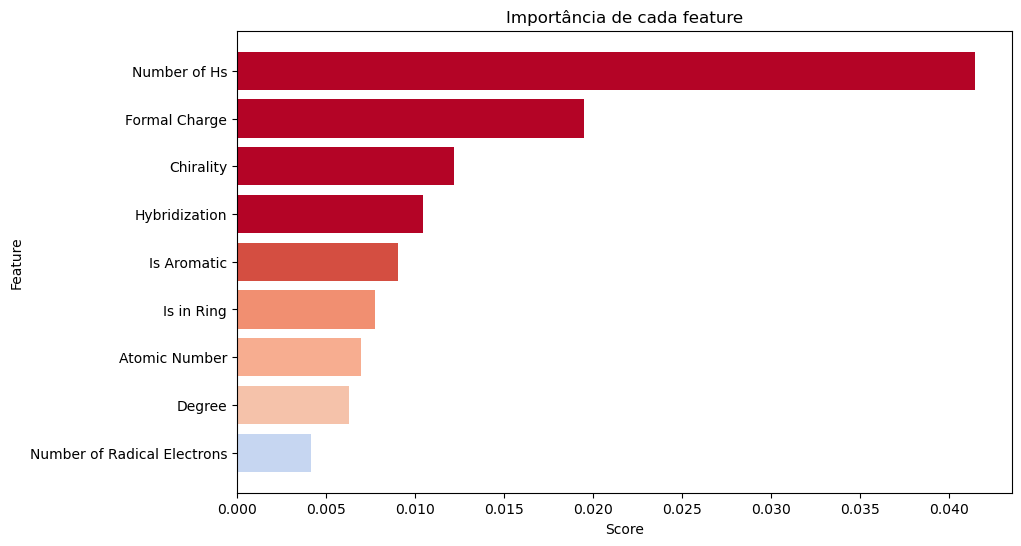

In [94]:
import matplotlib.pyplot as plt

feature_importance = compute_feature_importance(test_loader, gcn_model, loss_func)

feature_names = ['Atomic Number', 'Chirality', 'Degree', 'Formal Charge','Number of Hs', 'Number of Radical Electrons', 'Hybridization', 'Is Aromatic', 'Is in Ring']
sorted_indices = feature_importance.argsort(descending=True)
sorted_features = [feature_names[i-1] for i in sorted_indices]
sorted_scores = feature_importance[sorted_indices]
cmap = plt.get_cmap('coolwarm')

barcolors = [cmap(score*100) for score in sorted_scores]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_scores, color=barcolors)
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Importância de cada feature')
plt.gca().invert_yaxis() 
plt.show()


#### Recolher e guardar os gradientes para cada átomo

In [95]:
nr=0
atoms_gradients= []
for data in test_loader:
    optimizer.zero_grad()
    inputs = data.x.to(device)
    labels = data.y.to(device)
    inputs.requires_grad = True 

    outputs = gcn_model(inputs, data.edge_index,data.edge_attr,batch=data.batch)
    loss = loss_func(outputs, labels)
    loss.backward()
    # recolher gradientes de cada data
    atom_gradients = gcn_model.input.grad
    # guardar gradientes para cada átomo
    batch_size = atom_gradients.size(0)
    for i in range(batch_size):
        atom_grad = atom_gradients[i,:]
        node_saliency = torch.norm(F.relu(atom_grad)).item()
        atoms_gradients.append(atom_grad)
        nr+=1

#### Guardar imagens de moléculas com os átomos com maiores gradient scores destacados. Pasta: /interpretation/.

In [96]:
import re
def save_highlighted(smiles,weights):
    m = Chem.MolFromSmiles(smiles)
    m.__sssAtoms = weights
    m
    img = Draw.MolToImage(m, kekulize=True, wedgeBonds=True, highlightAtoms=weights)
    directory = "atom_interpretation"
    smiles = re.sub(r'[\\\/\+\=\[\]\-\#]', '_', smiles)
    if not os.path.exists(directory):
        os.makedirs(directory)

    img.save(os.path.join(directory, str(smiles)+".png"))

#### Ordenar e agregar os gradientes para a previsão da interação com o gene p53 de cada um dos átomos das moléculas

In [97]:
nrmoleculas = 0
for data in test_loader:
    natom=0
    for smile in data.smiles:
        nratomos = len(list(Chem.MolFromSmiles(smile).GetAtoms()))
        final = natom + nratomos
        print(smile)
        mean_gradients=[]
        j=0
        for a in range(natom,final):
            mean_gradients.append((j,torch.mean(atoms_gradients[a]).item()))
            j+=1
        print("<<<<<<")
        sorted_gradients = sorted(mean_gradients, key = lambda x : x[0],reverse=True)
        highlighted_atoms = []
        if(len(sorted_gradients)>=5):
            for i in range(0,5):
                highlighted_atoms.append(sorted_gradients[i][0])
        elif(len(sorted_gradients)>=1):
            for i in range(0,1):
                highlighted_atoms.append(sorted_gradients[i][0])
        save_highlighted(smile,highlighted_atoms)
        natom += nratomos+1
        nrmoleculas += 1
        if(nrmoleculas==5):break
    break

CN(C)c1ccc(N(C)C)cc1
<<<<<<
Oc1cc(O)c(Cl)cc1Cl
<<<<<<
C=C(C)C(=O)OC
<<<<<<
CCC(=O)c1ccc(O)cc1
<<<<<<
c1cc(OCC2CO2)ccc1Cc1ccc(OCC2CO2)cc1
<<<<<<


In [98]:
def calculate_edge_scores(edge_attr_grads):
    edge_grad_norms = torch.norm(edge_attr_grads, dim=1)
    edge_scores = (edge_grad_norms - edge_grad_norms.min()) / (edge_grad_norms.max() - edge_grad_norms.min())
    return edge_scores

In [99]:
def visualize_molecule_with_edge_scores(smiles, edge_scores):
    mol = Chem.MolFromSmiles(smiles)
    d = Chem.Draw.rdMolDraw2D.MolDraw2DCairo(300, 300)

    bond_colors = {}
    for i, score in enumerate(edge_scores):
        bond_colors[i] = cmap(score)

    Chem.Draw.rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=[], highlightBonds=list(range(mol.GetNumBonds())),highlightBondColors=bond_colors)
    directory = "edge_interpretation"
    smiles = re.sub(r'[\\\/\+\=\[\]\-\#]', '_', smiles)
    if not os.path.exists(directory):
        os.makedirs(directory)
    d.FinishDrawing()
    d.WriteDrawingText(os.path.join(directory, str(smiles)+".png"))

In [100]:
gcn_model.my_grads[0]

tensor([ 2.1040e-04,  8.1425e-05,  1.2578e-05, -1.1421e-04,  8.1515e-05,
         1.3381e-04, -7.9792e-05,  1.1460e-04, -1.0276e-07, -7.6909e-05,
         4.0317e-06,  1.3262e-04, -7.9666e-05,  1.3211e-04,  1.9672e-06,
         3.9291e-05,  3.5040e-05, -2.0554e-04,  3.9414e-06,  4.1611e-06,
         2.8359e-05,  1.6661e-04, -1.8344e-04,  4.3961e-05,  1.2586e-04,
        -1.4053e-04, -1.0250e-05,  1.3291e-04, -2.9162e-04, -9.0354e-06,
        -5.6137e-06, -6.6870e-05])

In [101]:
edge_grads = []
for data in test_loader:
    inputs = data.x.to(device)
    labels = data.y.to(device)
    optimizer.zero_grad()

    outputs = gcn_model(inputs, data.edge_index, data.edge_attr, batch=data.batch)
    loss = loss_func(outputs, labels)
    loss.backward()
    # Aceder aos gradientes dos edges
    edge_grads.append(gcn_model.my_grads[:, :data.edge_attr.size(0)])

In [102]:
scores = calculate_edge_scores(edge_grads[0])

In [103]:
sum=0
for data in test_loader:
    nrbond = 0
    for smile in data.smiles:
        nrbonds = len(list(Chem.MolFromSmiles(smile).GetBonds()))
        final = nrbond + nrbonds
        if(len(scores[nrbond:final])>0):
            visualize_molecule_with_edge_scores(smile,scores[nrbond:final])
        nrbond += nrbonds+1
    break


### Explainability for node classification on graph using Explainer and CaptumExplainer

In [104]:
from torch_geometric.explain import Explainer, CaptumExplainer

explainer = Explainer(
    gcn_model,  
    algorithm=CaptumExplainer('IntegratedGradients'),
    explanation_type='model',
    node_mask_type='attributes',
    edge_mask_type='object',
    model_config = dict(
        mode='binary_classification',
        task_level="graph",
        return_type="probs",
    ),
)

In [105]:
mydata = None
explanations = []
for data in test_loader:
    mydata = data
    explanation = explainer(mydata.x, mydata.edge_index, edge_attr=mydata.edge_attr, batch=mydata.batch)
    explanations.append(explanation)

#### Visualize feature importance of random sample

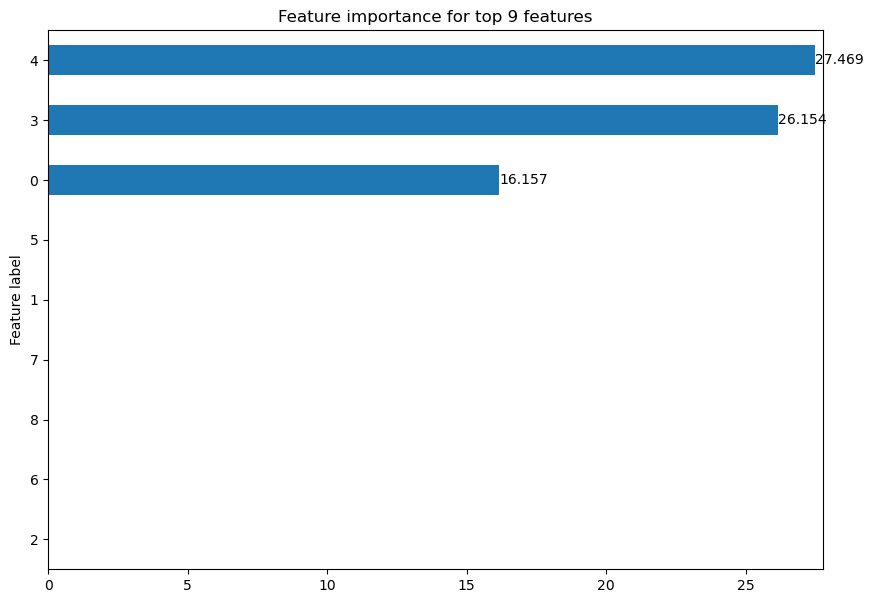

In [106]:
import random
sample = random.randrange(0,74)
explanations[sample].visualize_feature_importance(top_k=10)

Graph visualization

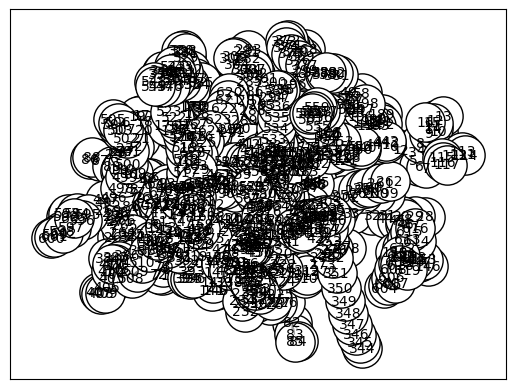

In [107]:
explanations[sample].visualize_graph()